# Pizza Drop

In [5]:
import math
import matplotlib.pyplot as plt

In [7]:
# constants
m=2 #(kg) 14" pizza, lots of toppings?
C_d=1.12 # flat plate, Table 6.2 in https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed
rho_air=1.2 # (kg/m^3)
r=7*0.0254 # (m) radius, 14" diameter pizza
A=math.pi*r**2 # (m^2) sphere
g=9.8 # (N/kg) Earth's surface

v0=-1e-12 # not zero to avoid divergence
h0=40 # (m) initial height 
t=0
dt=1e-3 # (s)

In [9]:
# compute terminal velocity
# f_net=0 means mg = F_air, solve for v
v_terminal = math.sqrt(m*g/(0.5*C_d*rho_air*A))
print("terminal velocity = %.2f (m/s)"%v_terminal)


terminal velocity = 17.14 (m/s)


In [11]:
t=0
v=v0
y=h0
t_limit=10 # (s) stop simulation after this time
v_s=[]
y_s=[]
t_s=[]
F_net_s=[]

# repeat DiffEq solver procedure many many times to get an approximate model for the motion
while (y>0 and t<t_limit) :
    
    # compute force
    F = -m*g + 0.5*C_d*rho_air*A*v*v*(-1.0*v/abs(v)) # the last bit is a unit vector so that aire resistance points against velocity

    # apprimately solve differential equation over a very short time interval
    # sometimes, this is called an "Euler" method
    a = F/m
    v2 = v + a*dt
    y2 = y + v*dt

    # store the current dynamic values
    v_s.append(v)
    y_s.append(y)
    t_s.append(t)
    F_net_s.append(F)
 
       # update/recycle values for the next loop
    t = t + dt
    v = v2
    y = y2

    if( not(y>0)): 
        print("the pizza hit the ground at t=%.2f seconds at vf=%.2e (m/s)"%(t,v))
    if ( not(t<t_limit) ):
        print("the pizza simulation ran out of time, at t=%.2f seconds, vf=%.2e (m/s), height=%.2e (m)"%(t,v,y))    

the pizza hit the ground at t=3.52 seconds at vf=-1.65e+01 (m/s)


Text(0, 0.5, 'height, y (m/s)')

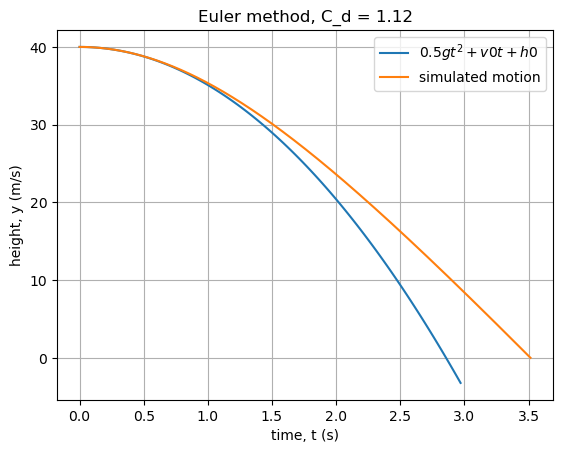

In [13]:
N=100
tfake=[]
xfake=[]
for i in range(N):
    tf=i*3/N
    tfake.append(tf)
    xfake.append(-0.5*g*tf**2+v0*tf+h0)

plt.title("Euler method, C_d = %.2f"%C_d)
plt.plot(tfake,xfake,label="$0.5 g t^2+v0 t+h0$")
plt.plot(t_s,y_s,label="simulated motion")
plt.legend()
plt.grid()
plt.xlabel("time, t (s)")
plt.ylabel("height, y (m/s)")


Text(0, 0.5, 'velocity, v (m/s)')

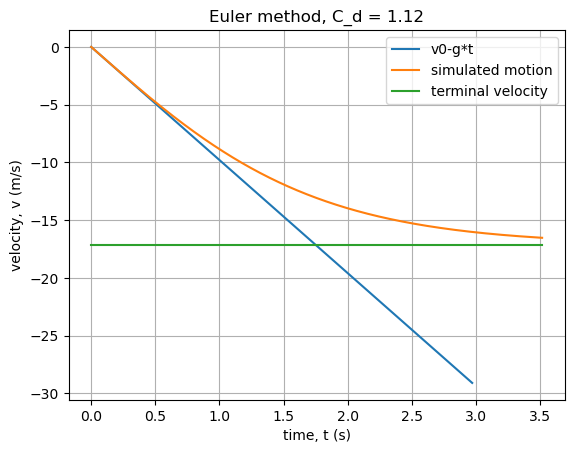

In [15]:
N=100
tfake=[]
vfake=[]
for i in range(N):
    tf=i*3/N
    tfake.append(tf)
    vfake.append(-tf*g+v0)

plt.title("Euler method, C_d = %.2f"%C_d)
plt.plot(tfake,vfake,label="v0-g*t")
plt.plot(t_s,v_s,label="simulated motion")
plt.plot([min(t_s),max(t_s)],[-v_terminal,-v_terminal],label="terminal velocity")
plt.legend()
plt.grid()
plt.xlabel("time, t (s)")
plt.ylabel("velocity, v (m/s)")

Text(0, 0.5, 'Net Force, F, (N)')

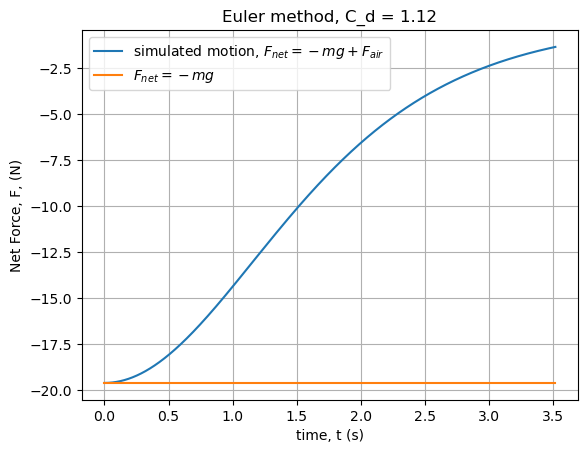

In [17]:
plt.title("Euler method, C_d = %.2f"%C_d)
plt.plot(t_s,F_net_s,label="simulated motion, $F_{net}=-mg+F_{air}$")
plt.plot([min(t_s),max(t_s)],[-m*g,-m*g],label="$F_{net}=-mg$")
plt.legend()
plt.grid()
plt.xlabel("time, t (s)")
plt.ylabel("Net Force, F, (N)")